# Loading data

In [126]:
import pandas as pd

In [127]:
path_features = 'data/training_set_features.csv'
path_targets = 'data/training_set_labels.csv'

In [128]:
df_fts = pd.read_csv(path_features, index_col = 'respondent_id')
df_tgs = pd.read_csv(path_targets, index_col = 'respondent_id')

In [129]:
df = df_tgs.merge(df_fts, on = 'respondent_id', indicator = True)

## Sanity check after merging

- .merge(indicator = True)
- df['merge'].value_counts()
- merge how = 'inner'
- all both 26707
- It indicates one to one data relation

In [130]:
df['_merge'].value_counts()

_merge
both          26707
left_only         0
right_only        0
Name: count, dtype: int64

# Machine Learning

In [131]:
# import packages
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

import seaborn as sns

import numpy as np

## Grouping variables

In [132]:
behavioral = ['behavioral_antiviral_meds', 
              'behavioral_avoidance',
              'behavioral_face_mask', 
              'behavioral_wash_hands',
              'behavioral_large_gatherings', 
              'behavioral_outside_home',
              'behavioral_touch_face']

In [133]:
opinion = ['opinion_h1n1_vacc_effective', 
           'opinion_h1n1_risk',
           'opinion_h1n1_sick_from_vacc', 
           'opinion_seas_vacc_effective',
           'opinion_seas_risk', 
           'opinion_seas_sick_from_vacc'] # drop h1n1 related

In [134]:
extra = ['h1n1_concern', 
         'h1n1_knowledge',
         'doctor_recc_h1n1', 
         'doctor_recc_seasonal',
         'chronic_med_condition'] # drop doctor_recc_seasonal

In [135]:
background = ['child_under_6_months',
              'age_group',
              'education', 
              'race', 
              'sex',
              'marital_status',
              'household_adults', 
              'household_children',
              'health_worker'] # drop health_worker, 'child_under_6_months'

In [136]:
economical = ['health_insurance',
              'income_poverty',
              'rent_or_own', 
              'employment_status',
              'employment_industry',
              'employment_occupation'] # drop health_insurance,'employment_industry','employment_occupation'

In [137]:
location = ['hhs_geo_region', 
            'census_msa'] # drop census_msa

## Decision tree of behavioral, opinion, and extra

In [138]:
boe_df = df[behavioral+opinion+extra+['seasonal_vaccine']]

In [139]:
boe_dropped = boe_df.dropna()

In [140]:
X = boe_dropped.drop(labels = ['seasonal_vaccine'], axis = 1)
y = boe_dropped['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Instantiate DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 5, random_state = 42)

# Fit to train samples
tree_clf.fit(X_train, y_train)

# Predict using X_test
y_pred = tree_clf.predict(X_test)

# Evaluate the model by accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))

Accuracy: 74.63177958759314


In [141]:
boe_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    26636 non-null  float64
 1   behavioral_avoidance         26499 non-null  float64
 2   behavioral_face_mask         26688 non-null  float64
 3   behavioral_wash_hands        26665 non-null  float64
 4   behavioral_large_gatherings  26620 non-null  float64
 5   behavioral_outside_home      26625 non-null  float64
 6   behavioral_touch_face        26579 non-null  float64
 7   opinion_h1n1_vacc_effective  26316 non-null  float64
 8   opinion_h1n1_risk            26319 non-null  float64
 9   opinion_h1n1_sick_from_vacc  26312 non-null  float64
 10  opinion_seas_vacc_effective  26245 non-null  float64
 11  opinion_seas_risk            26193 non-null  float64
 12  opinion_seas_sick_from_vacc  26170 non-null  float64
 13  h1n1_concern         

In [142]:
boe_df['doctor_recc_seasonal'].value_counts()

doctor_recc_seasonal
0.0    16453
1.0     8094
Name: count, dtype: int64

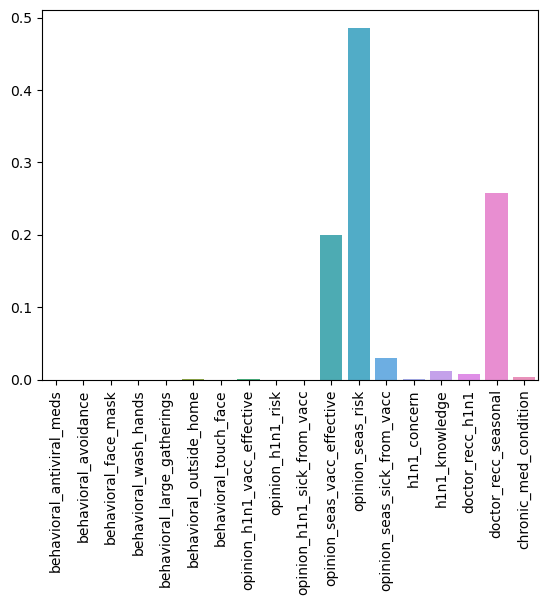

In [143]:
# Showing feature importances by the Decision Tree
sns.barplot(x = boe_dropped.columns[:-1], y = tree_clf.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

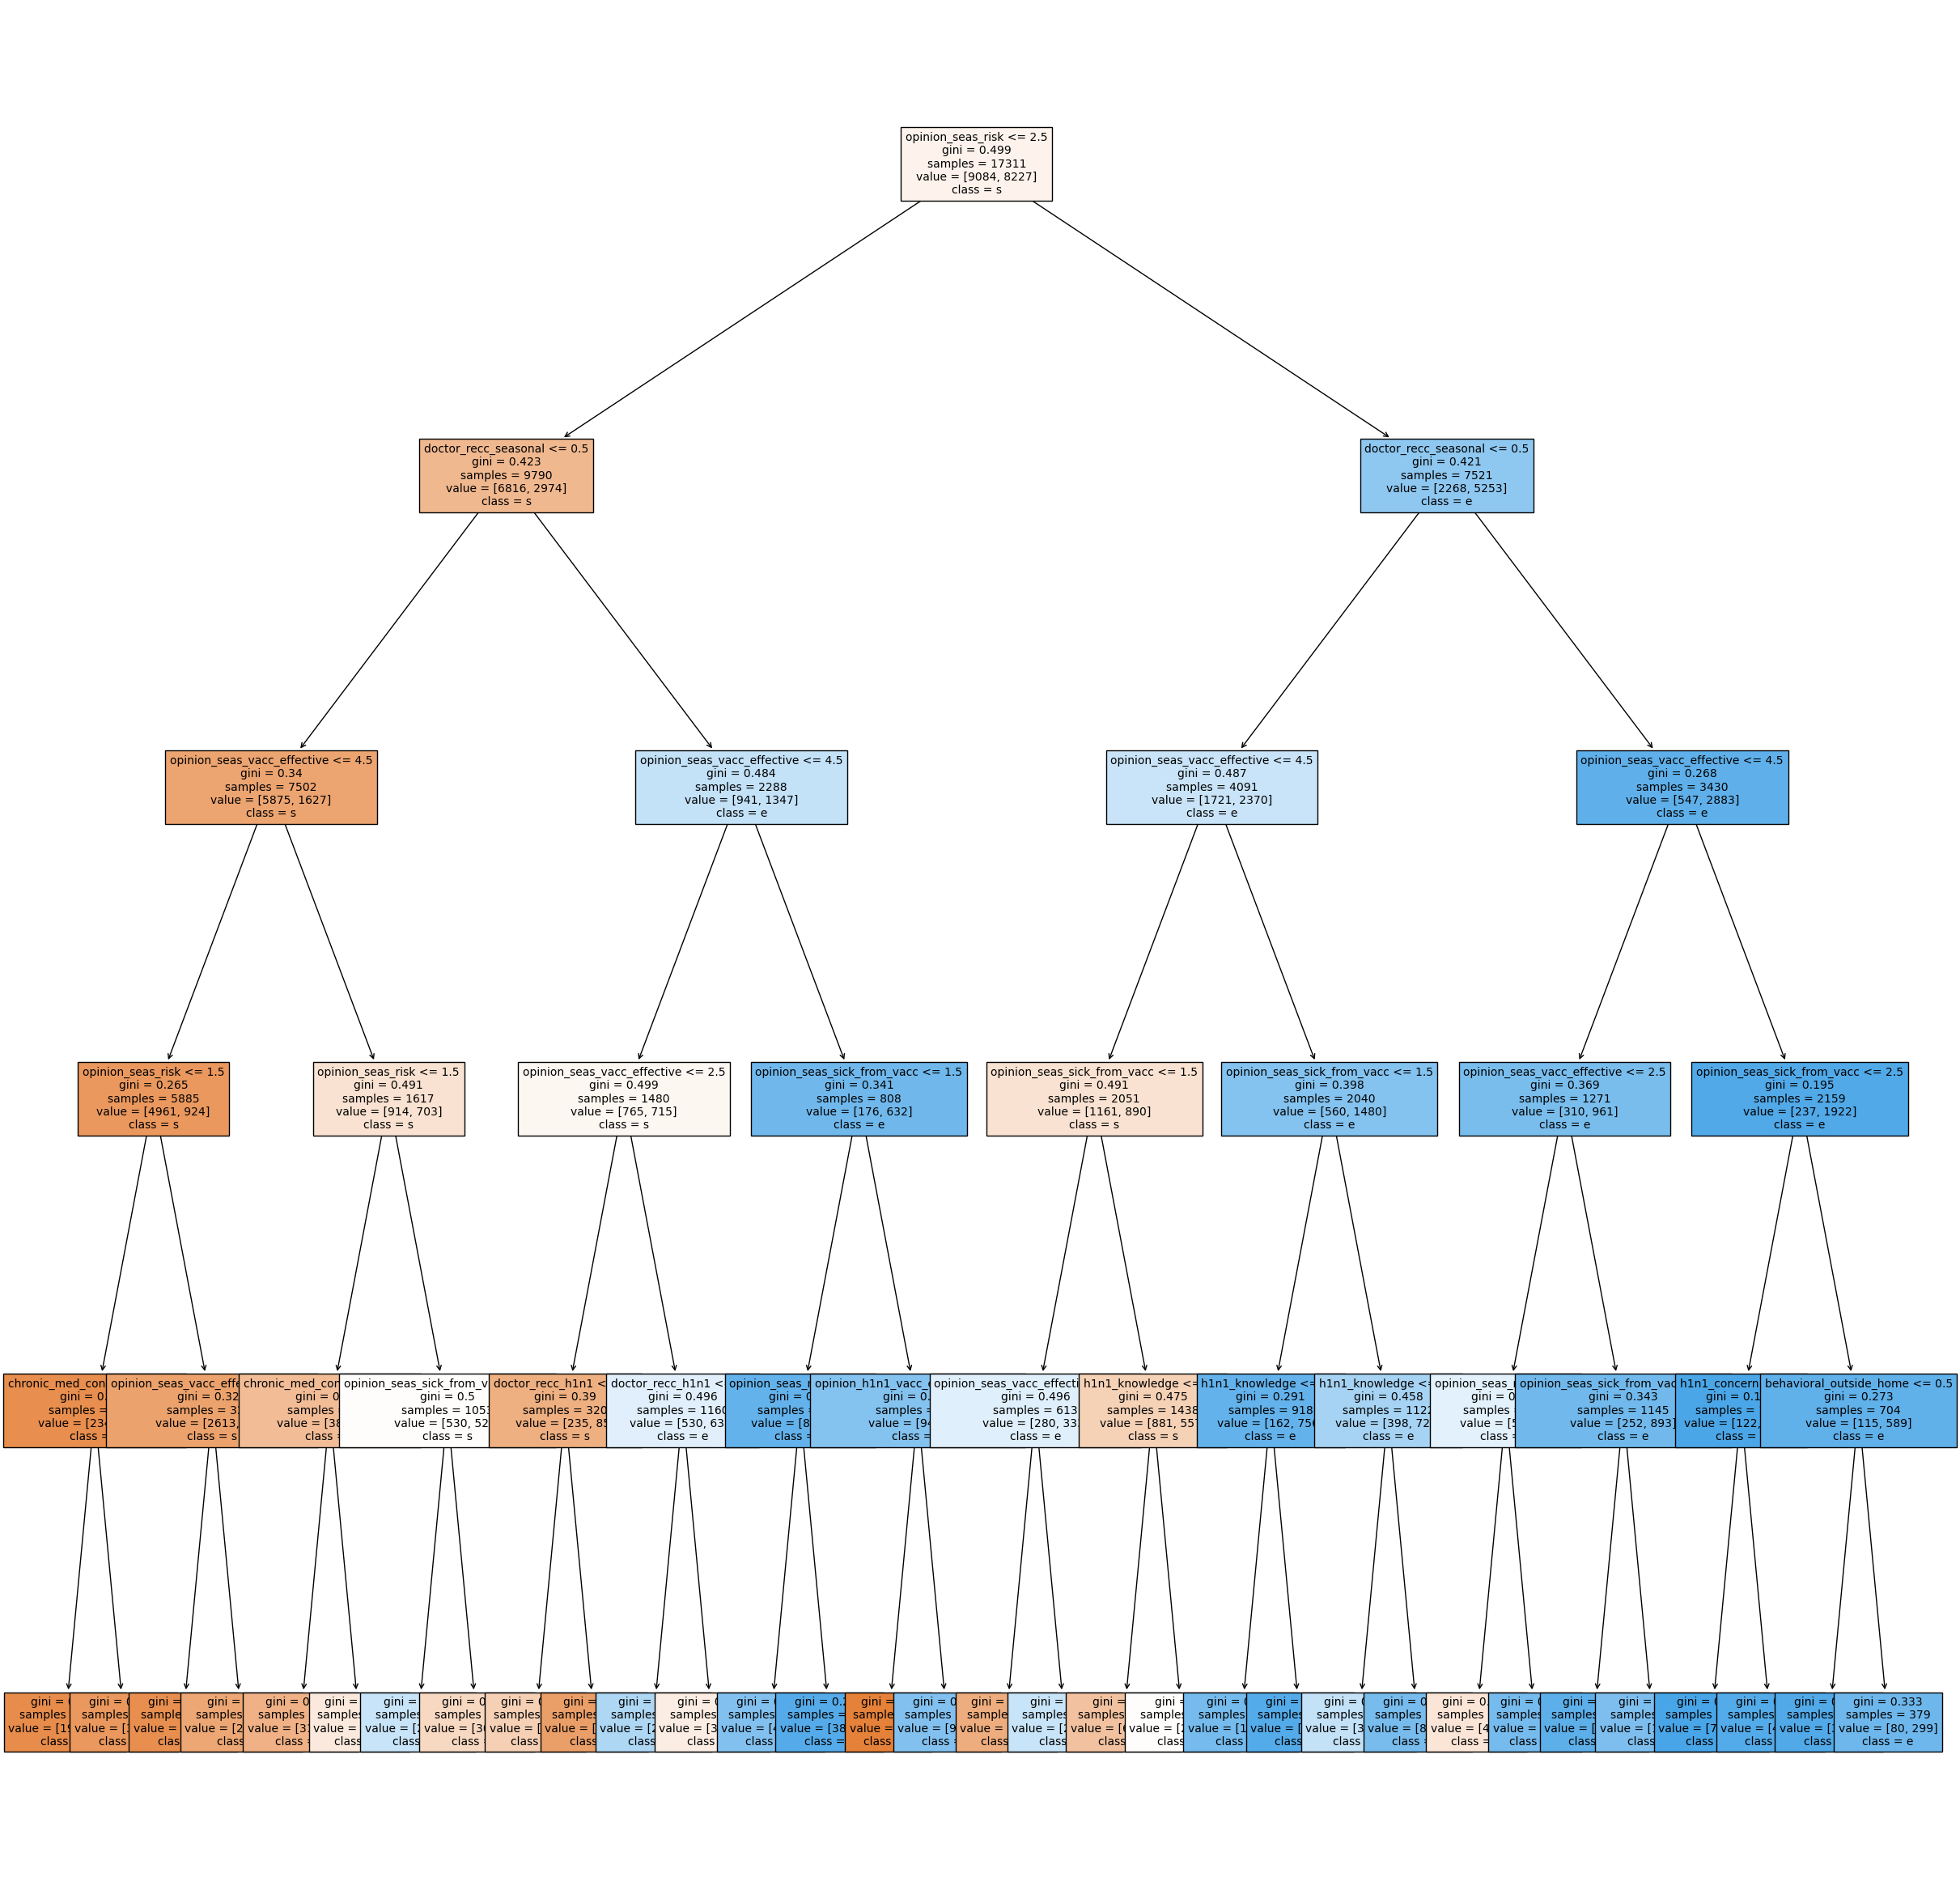

In [144]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (30,30))
plot_tree(tree_clf, feature_names = list(boe_dropped.columns[:-1]), class_names = list(boe_dropped.columns[-1]), filled = True, fontsize = 10 );

# features we want to focus

In [145]:
df.columns

Index(['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', '_merge'],
      dtype='object')

In [146]:
wf = ['doctor_recc_seasonal', 
      'opinion_seas_vacc_effective',
      'opinion_seas_risk',
      'opinion_seas_sick_from_vacc',
      'age_group',
      'education',
      'race',
      'sex',
      'income_poverty',
      'marital_status',
      'hhs_geo_region',
      'household_children',
      'seasonal_vaccine']
wf_df = df[wf]

In [147]:
wf_dropped = wf_df.dropna()

In [148]:
wf_dropped.columns

Index(['doctor_recc_seasonal', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'hhs_geo_region', 'household_children', 'seasonal_vaccine'],
      dtype='object')

In [149]:
wf_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20436 entries, 0 to 26706
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   doctor_recc_seasonal         20436 non-null  float64
 1   opinion_seas_vacc_effective  20436 non-null  float64
 2   opinion_seas_risk            20436 non-null  float64
 3   opinion_seas_sick_from_vacc  20436 non-null  float64
 4   age_group                    20436 non-null  object 
 5   education                    20436 non-null  object 
 6   race                         20436 non-null  object 
 7   sex                          20436 non-null  object 
 8   income_poverty               20436 non-null  object 
 9   marital_status               20436 non-null  object 
 10  hhs_geo_region               20436 non-null  object 
 11  household_children           20436 non-null  float64
 12  seasonal_vaccine             20436 non-null  int64  
dtypes: float64(5), int64(

# DecisionTreeClassifier with OrdinalEncoder

### OrdinalEncoder for a list we want to focus

In [150]:
X = wf_dropped.drop('seasonal_vaccine', axis =1)
y = wf_dropped['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#OrdinalEncoder
# Create an ordinal encoder instance
encoder = OrdinalEncoder()
# Fit and transform the data
X_tr_cd = encoder.fit_transform(X_train)
X_tt_cd = encoder.transform(X_test)
# Access the categories mapping
categories_mapping = {feature: encoder.categories_[i].tolist() for i, feature in enumerate(X_train.columns)}
# Display the mapping
print(categories_mapping)


# Instantiate DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 6, random_state = 42)

# Fit to train samples
tree_clf.fit(X_tr_cd, y_train)

# Predict using X_test
y_pred = tree_clf.predict(X_tt_cd)

# Evaluate the model by accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))

{'doctor_recc_seasonal': [0.0, 1.0], 'opinion_seas_vacc_effective': [1.0, 2.0, 3.0, 4.0, 5.0], 'opinion_seas_risk': [1.0, 2.0, 3.0, 4.0, 5.0], 'opinion_seas_sick_from_vacc': [1.0, 2.0, 3.0, 4.0, 5.0], 'age_group': ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years'], 'education': ['12 Years', '< 12 Years', 'College Graduate', 'Some College'], 'race': ['Black', 'Hispanic', 'Other or Multiple', 'White'], 'sex': ['Female', 'Male'], 'income_poverty': ['<= $75,000, Above Poverty', '> $75,000', 'Below Poverty'], 'marital_status': ['Married', 'Not Married'], 'hhs_geo_region': ['atmpeygn', 'bhuqouqj', 'dqpwygqj', 'fpwskwrf', 'kbazzjca', 'lrircsnp', 'lzgpxyit', 'mlyzmhmf', 'oxchjgsf', 'qufhixun'], 'household_children': [0.0, 1.0, 2.0, 3.0]}
Accuracy: 75.72910550009787


In [151]:
wf_dropped.columns[:-1]

Index(['doctor_recc_seasonal', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'hhs_geo_region', 'household_children'],
      dtype='object')

In [152]:
tree_clf.feature_importances_

array([2.22250678e-01, 1.58514590e-01, 4.43232980e-01, 1.44357728e-02,
       1.21042179e-01, 1.62434485e-02, 6.22512514e-03, 7.14024307e-04,
       1.40074118e-02, 4.11519235e-04, 2.92227063e-03, 0.00000000e+00])

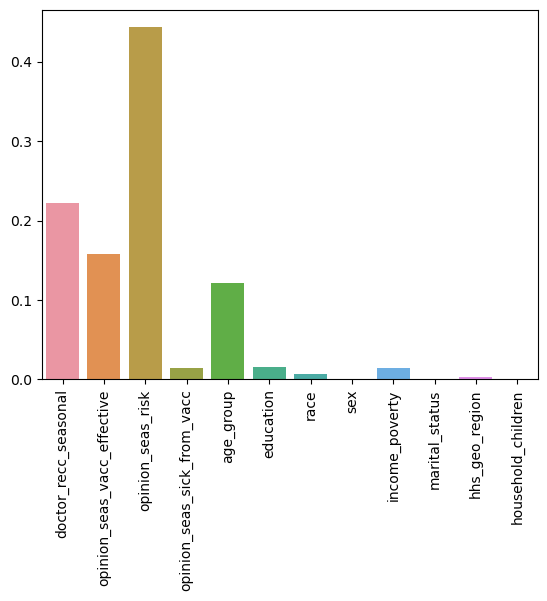

In [153]:
# Showing feature importances by the Decision Tree
sns.barplot(x = wf_dropped.columns[:-1], y = tree_clf.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

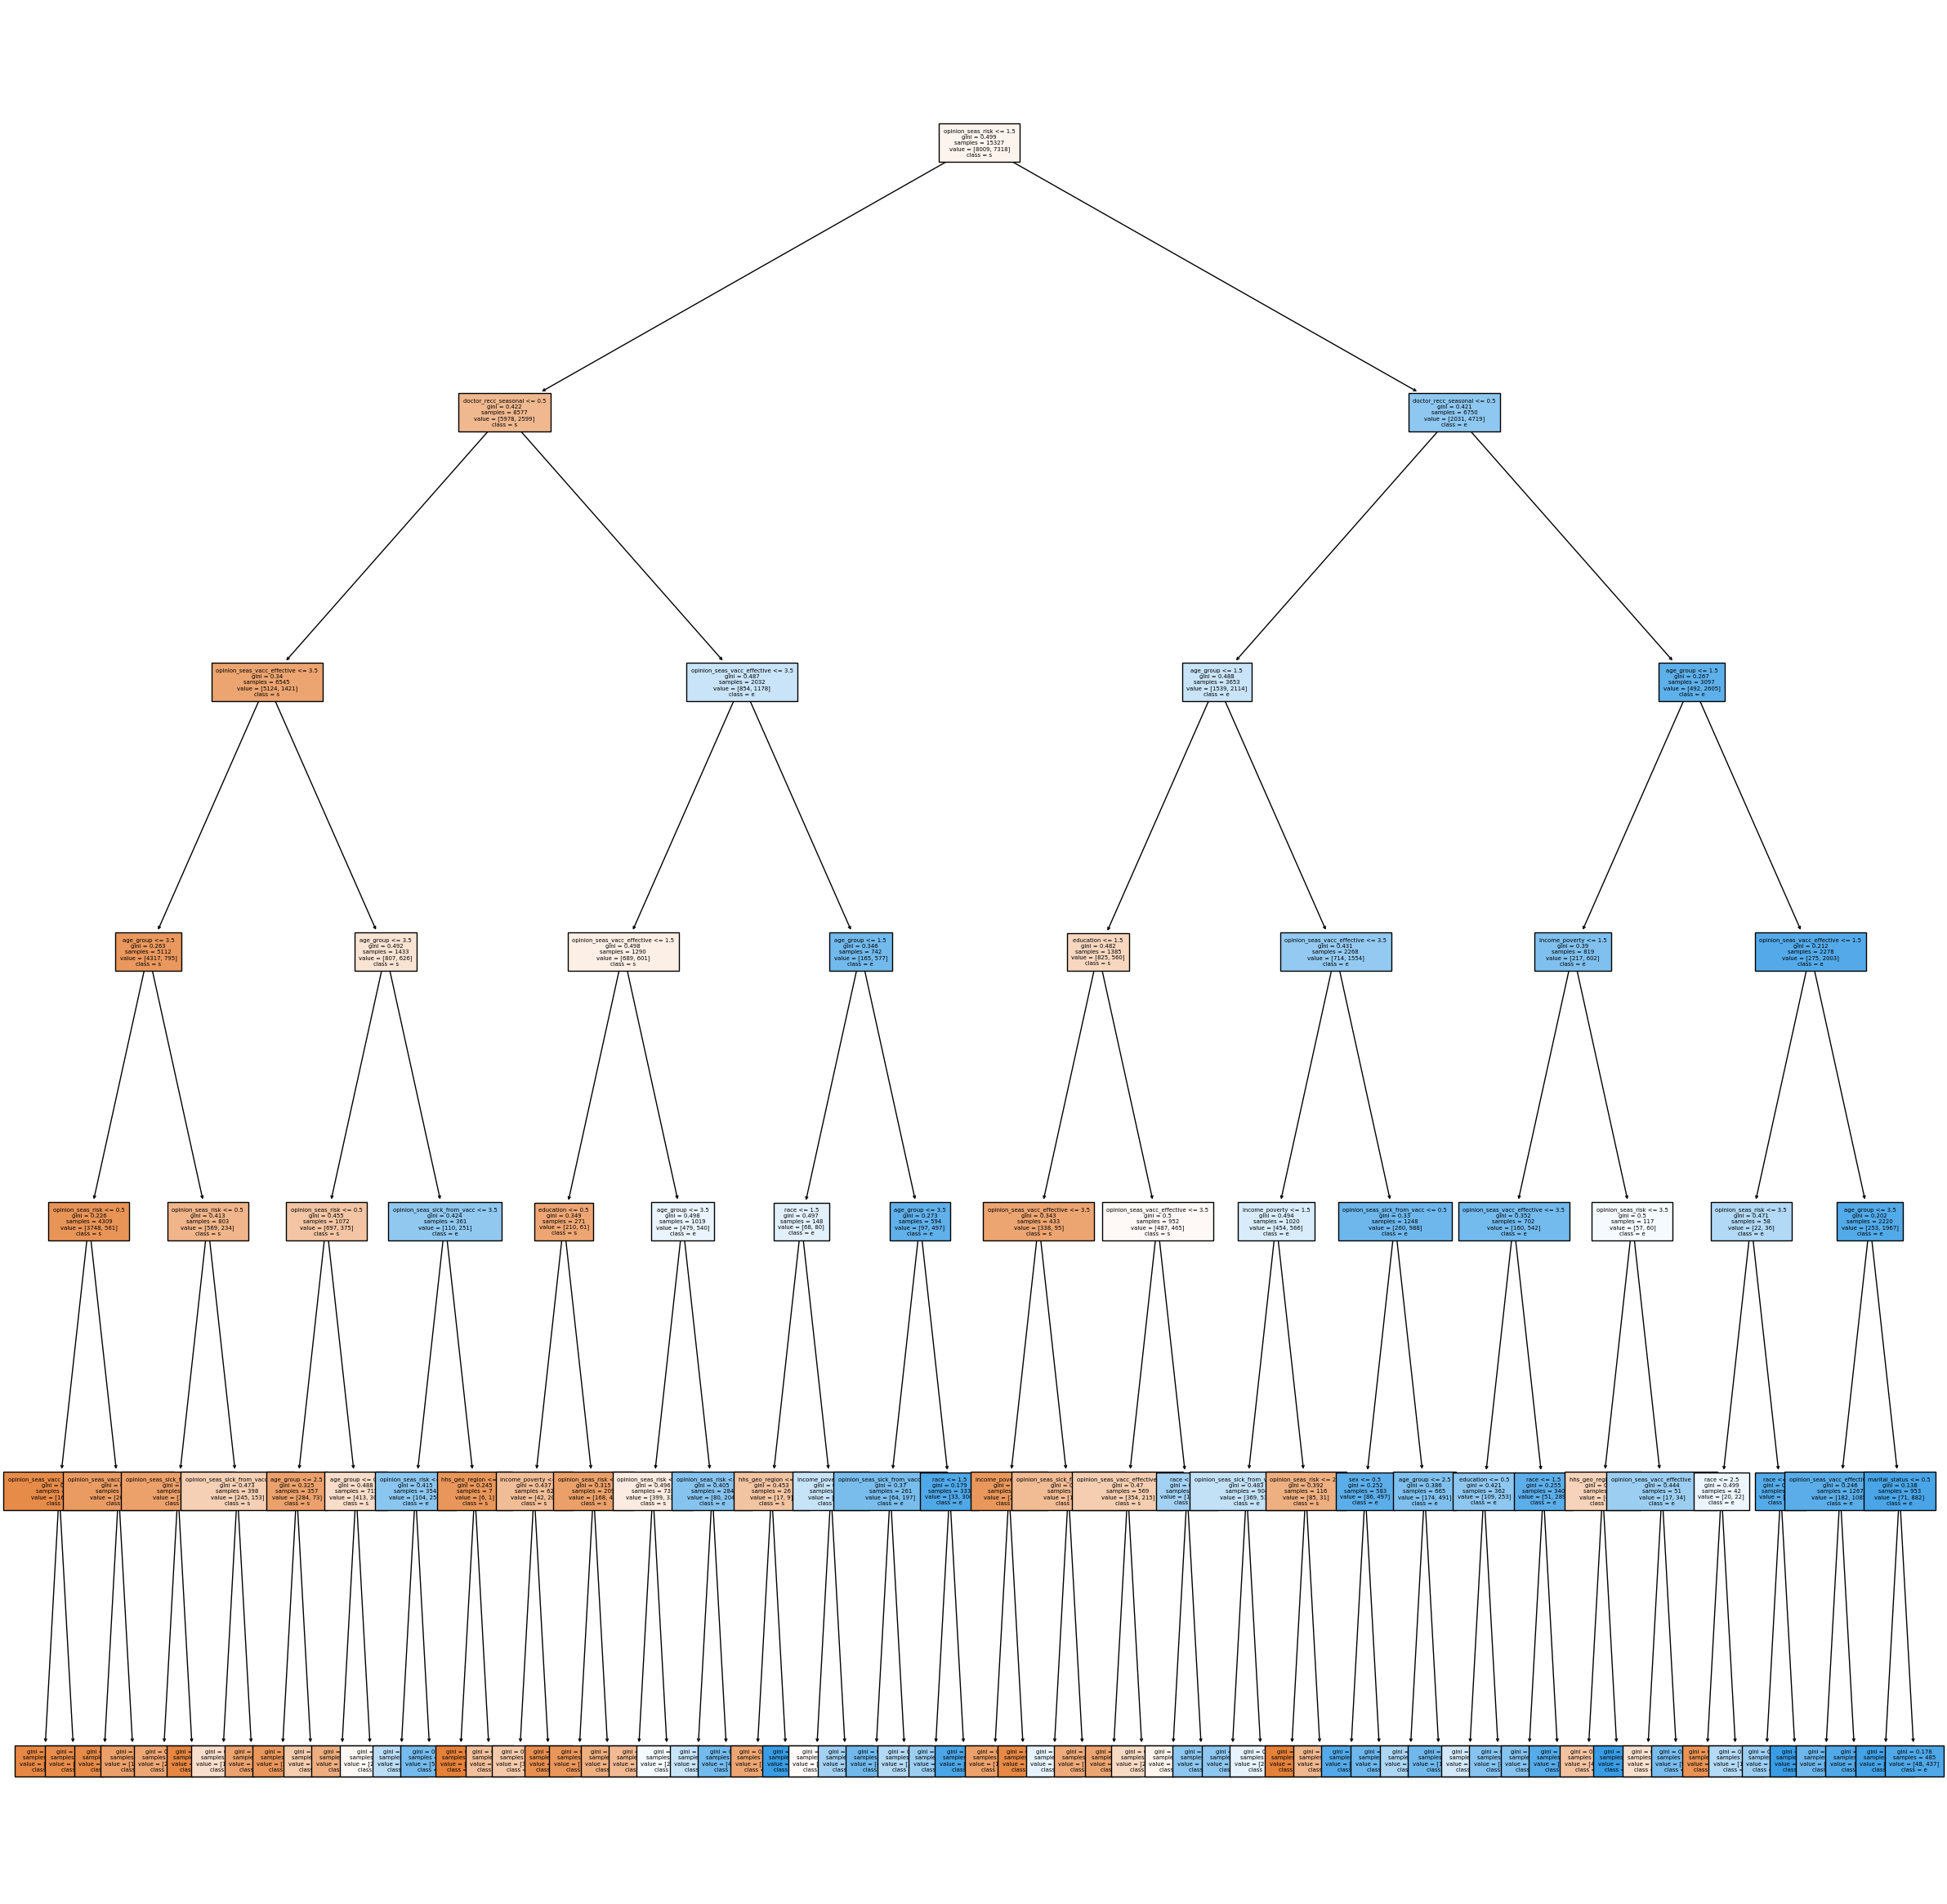

In [154]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (30,30))
plot_tree(tree_clf, 
          feature_names = list(wf_dropped.columns[:-1]), 
          class_names = list(wf_dropped.columns[-1]), 
          filled = True,
          fontsize = 5
         );

In [155]:
wf = ['age_group',
      'education',
      'race',
      'sex',
      'income_poverty',
      'marital_status',
      'hhs_geo_region',
      'household_children',
      'seasonal_vaccine']
wf_df = df[wf]

In [156]:
wf_dropped = wf_df.dropna()

In [157]:
X = wf_dropped.drop('seasonal_vaccine', axis =1)
y = wf_dropped['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#OrdinalEncoder
# Create an ordinal encoder instance
encoder = OrdinalEncoder()
# Fit and transform the data
X_tr_cd = encoder.fit_transform(X_train)
X_tt_cd = encoder.transform(X_test)
# Access the categories mapping
categories_mapping = {feature: encoder.categories_[i].tolist() for i, feature in enumerate(X_train.columns)}
# Display the mapping
print(categories_mapping)


# Instantiate DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)

# Fit to train samples
tree_clf.fit(X_tr_cd, y_train)

# Predict using X_test
y_pred = tree_clf.predict(X_tt_cd)

# Evaluate the model by accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))

{'age_group': ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years'], 'education': ['12 Years', '< 12 Years', 'College Graduate', 'Some College'], 'race': ['Black', 'Hispanic', 'Other or Multiple', 'White'], 'sex': ['Female', 'Male'], 'income_poverty': ['<= $75,000, Above Poverty', '> $75,000', 'Below Poverty'], 'marital_status': ['Married', 'Not Married'], 'hhs_geo_region': ['atmpeygn', 'bhuqouqj', 'dqpwygqj', 'fpwskwrf', 'kbazzjca', 'lrircsnp', 'lzgpxyit', 'mlyzmhmf', 'oxchjgsf', 'qufhixun'], 'household_children': [0.0, 1.0, 2.0, 3.0]}
Accuracy: 62.21056439942113


In [158]:
c = list(wf_dropped.columns[:-1])

In [159]:
i = list(tree_clf.feature_importances_)

In [160]:
ci = df = pd.DataFrame({'names': c, 'importance': i})

In [161]:
ci

,names,importance
0,age_group,0.875993
1,education,0.062209
2,race,0.014681
3,sex,0.015216
4,income_poverty,0.031901
5,marital_status,0.000000
6,hhs_geo_region,0.000000
7,household_children,0.000000


In [162]:
ci.to_csv('feature_importance.csv', index=False)

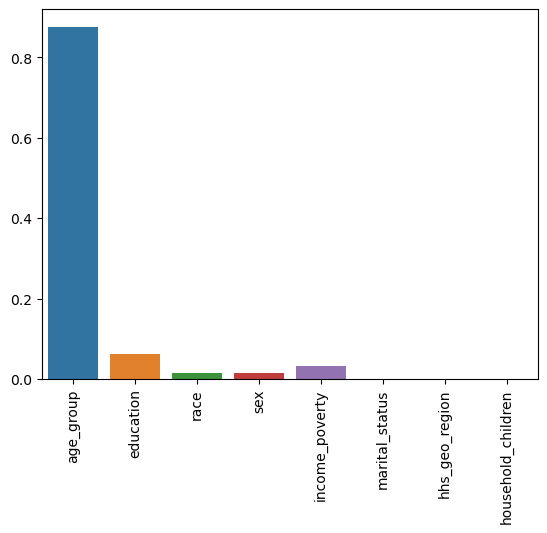

In [163]:
# Showing feature importances by the Decision Tree
sns.barplot(x = wf_dropped.columns[:-1], y = tree_clf.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

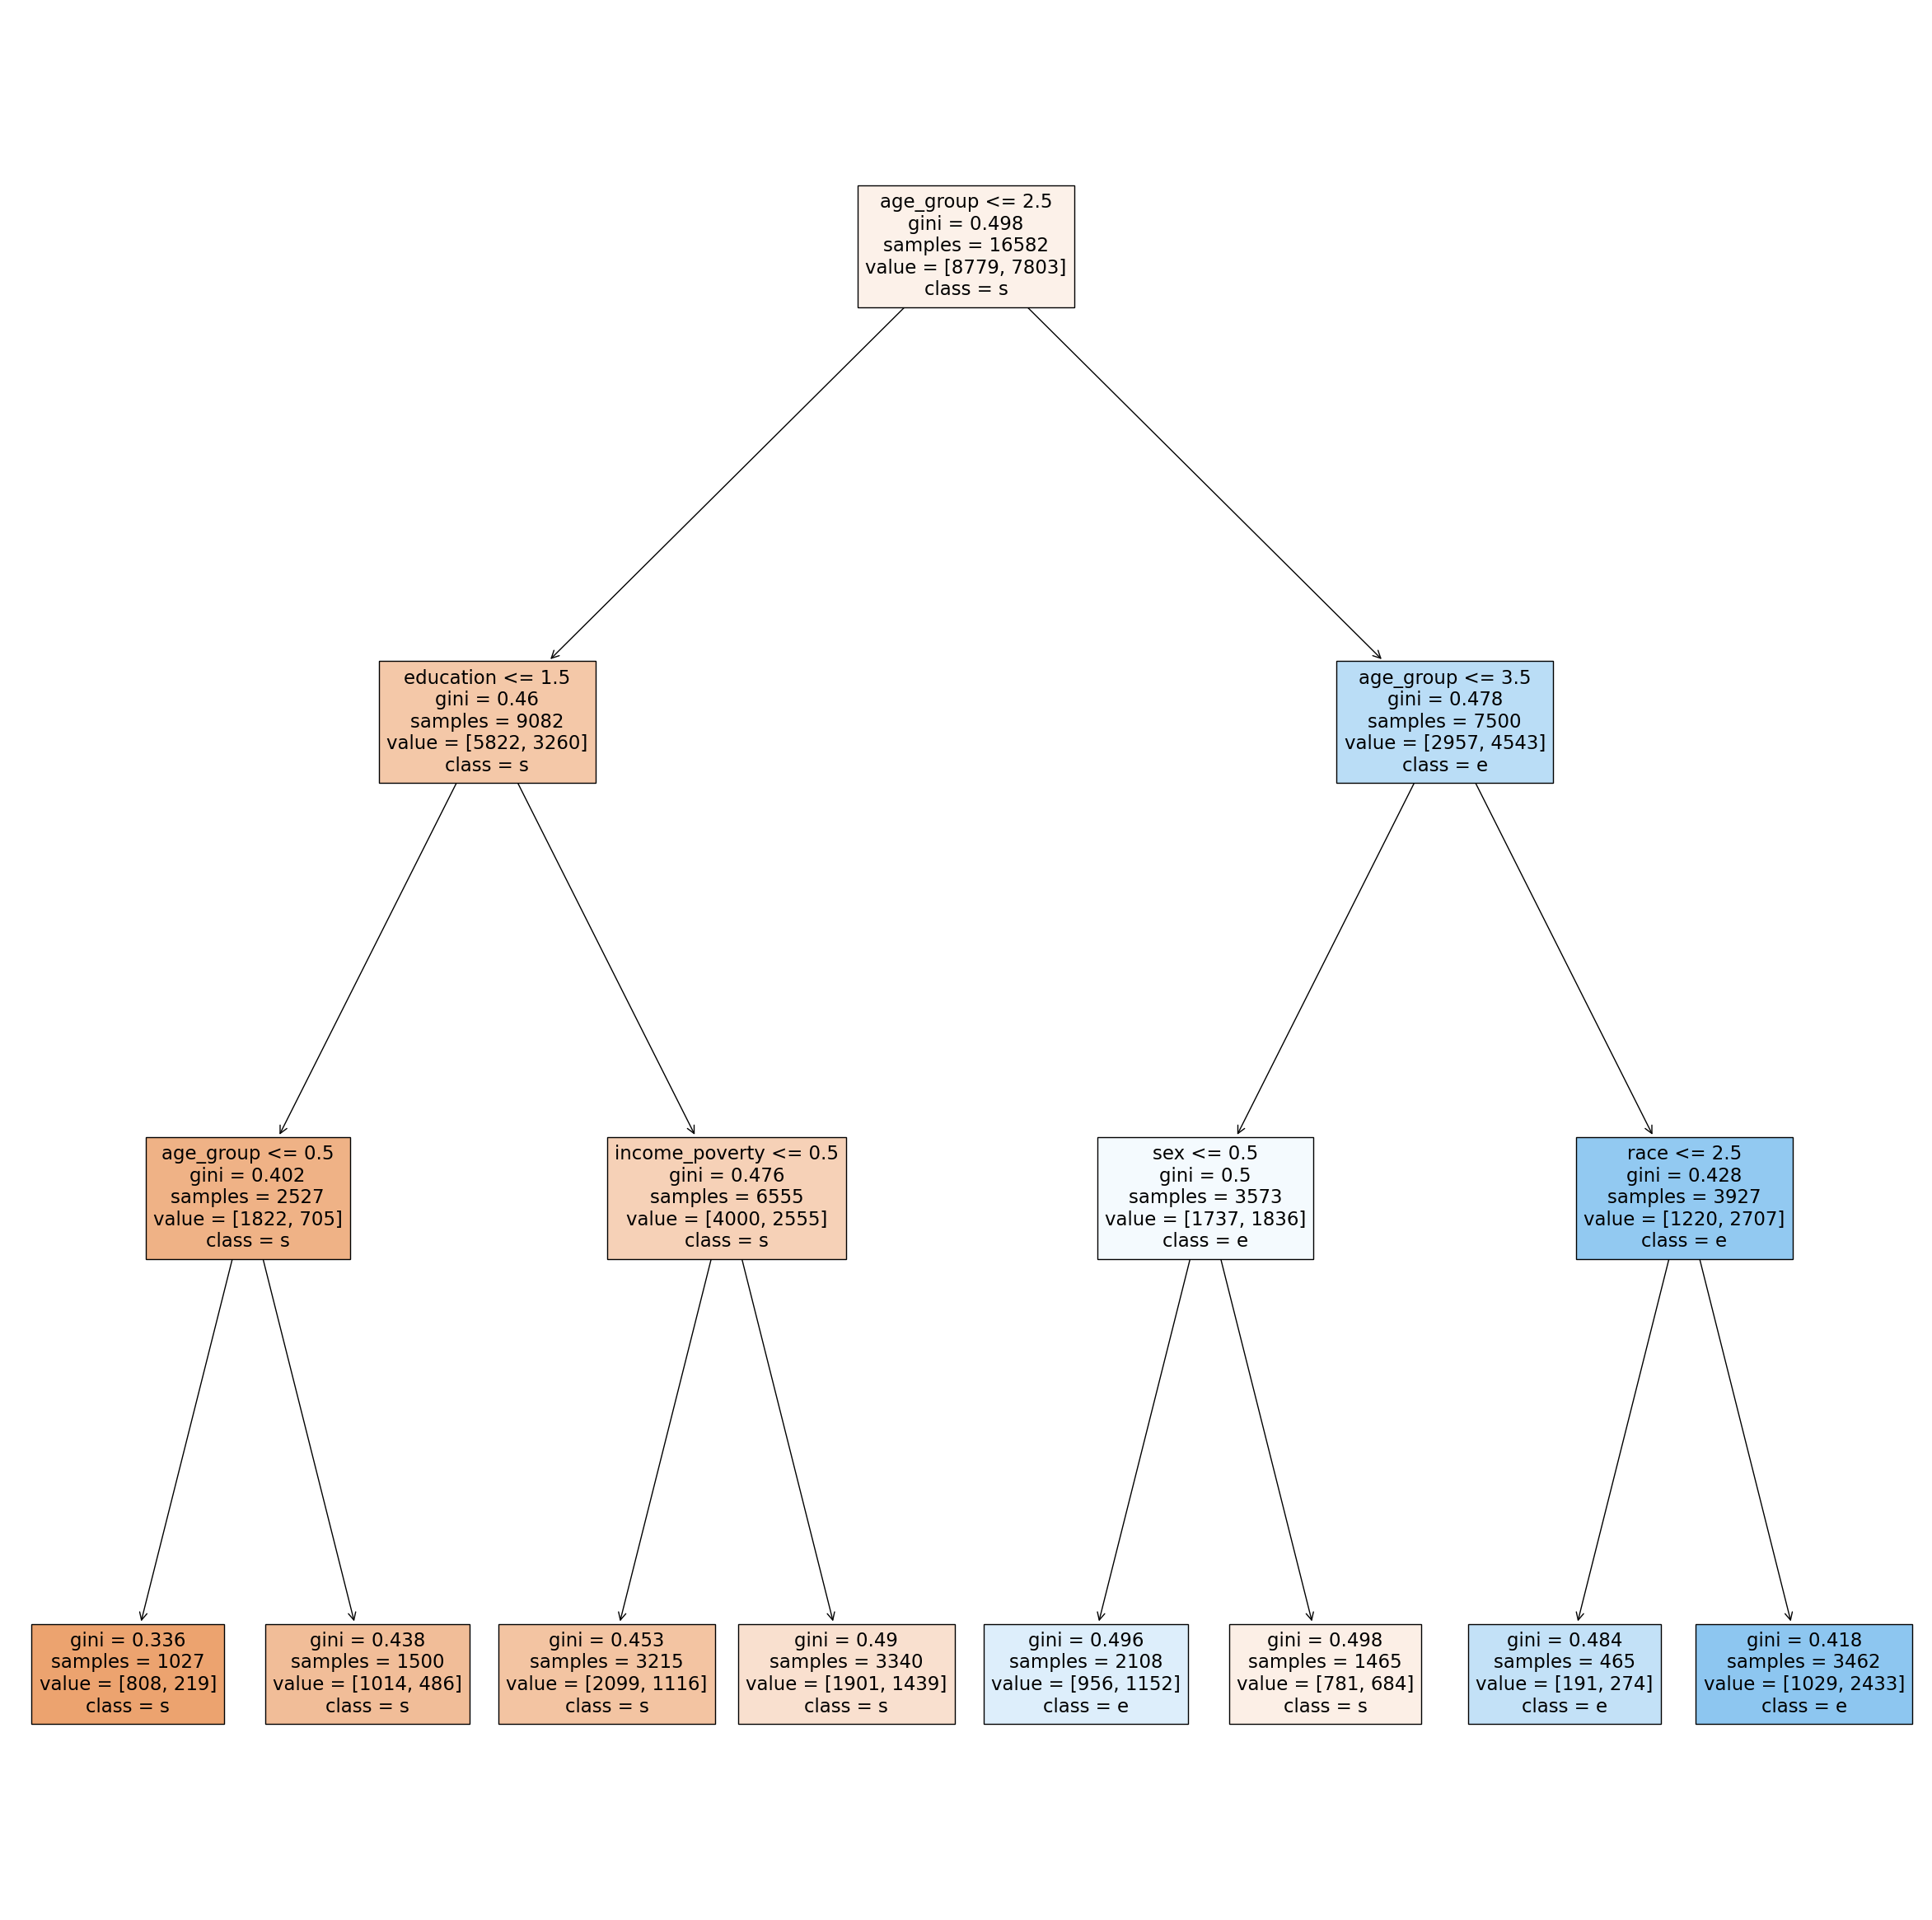

In [164]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (30,30))
plot_tree(tree_clf, feature_names = list(wf_dropped.columns[:-1]), class_names = list(wf_dropped.columns[-1]), filled = True );

In [165]:
wf_dropped = wf_df.dropna()

In [166]:
wf_dropped['age_group'].value_counts()

age_group
65+ Years        5238
55 - 64 Years    4748
45 - 54 Years    4490
18 - 34 Years    4360
35 - 44 Years    3274
Name: count, dtype: int64

In [167]:
age_cond = (wf_dropped['age_group'] == '18 - 34 Years') | (wf_dropped['age_group'] == '35 - 44 Years')

In [168]:
wf_dropped = wf_dropped[age_cond]

In [169]:
wf_dropped['age_group'].value_counts()

age_group
18 - 34 Years    4360
35 - 44 Years    3274
Name: count, dtype: int64

In [170]:
wf_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7634 entries, 1 to 26705
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age_group           7634 non-null   object 
 1   education           7634 non-null   object 
 2   race                7634 non-null   object 
 3   sex                 7634 non-null   object 
 4   income_poverty      7634 non-null   object 
 5   marital_status      7634 non-null   object 
 6   hhs_geo_region      7634 non-null   object 
 7   household_children  7634 non-null   float64
 8   seasonal_vaccine    7634 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 596.4+ KB


In [171]:
wf_dropped = wf_dropped.drop('age_group', axis =1)

In [172]:
wf_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7634 entries, 1 to 26705
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   education           7634 non-null   object 
 1   race                7634 non-null   object 
 2   sex                 7634 non-null   object 
 3   income_poverty      7634 non-null   object 
 4   marital_status      7634 non-null   object 
 5   hhs_geo_region      7634 non-null   object 
 6   household_children  7634 non-null   float64
 7   seasonal_vaccine    7634 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 536.8+ KB


In [173]:
X = wf_dropped.drop('seasonal_vaccine', axis =1)
y = wf_dropped['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#OrdinalEncoder
# Create an ordinal encoder instance
encoder = OrdinalEncoder()
# Fit and transform the data
X_tr_cd = encoder.fit_transform(X_train)
X_tt_cd = encoder.transform(X_test)
# Access the categories mapping
categories_mapping = {feature: encoder.categories_[i].tolist() for i, feature in enumerate(X_train.columns)}
# Display the mapping
print(categories_mapping)


# Instantiate DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)

# Fit to train samples
tree_clf.fit(X_tr_cd, y_train)

# Predict using X_test
y_pred = tree_clf.predict(X_tt_cd)

# Evaluate the model by accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))

{'education': ['12 Years', '< 12 Years', 'College Graduate', 'Some College'], 'race': ['Black', 'Hispanic', 'Other or Multiple', 'White'], 'sex': ['Female', 'Male'], 'income_poverty': ['<= $75,000, Above Poverty', '> $75,000', 'Below Poverty'], 'marital_status': ['Married', 'Not Married'], 'hhs_geo_region': ['atmpeygn', 'bhuqouqj', 'dqpwygqj', 'fpwskwrf', 'kbazzjca', 'lrircsnp', 'lzgpxyit', 'mlyzmhmf', 'oxchjgsf', 'qufhixun'], 'household_children': [0.0, 1.0, 2.0, 3.0]}
Accuracy: 68.51754845468831


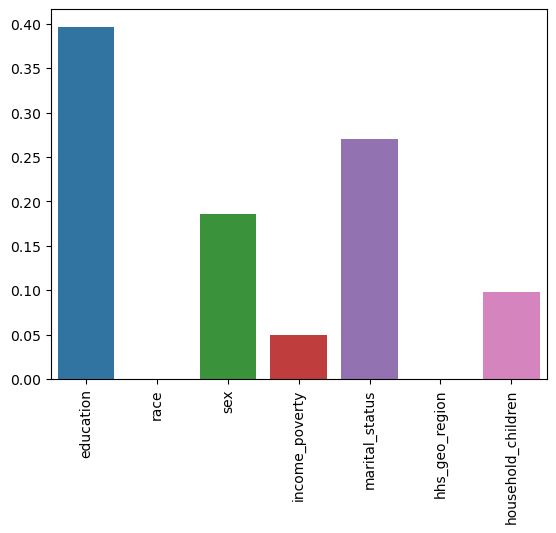

In [174]:
# Showing feature importances by the Decision Tree
sns.barplot(x = wf_dropped.columns[:-1], y = tree_clf.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

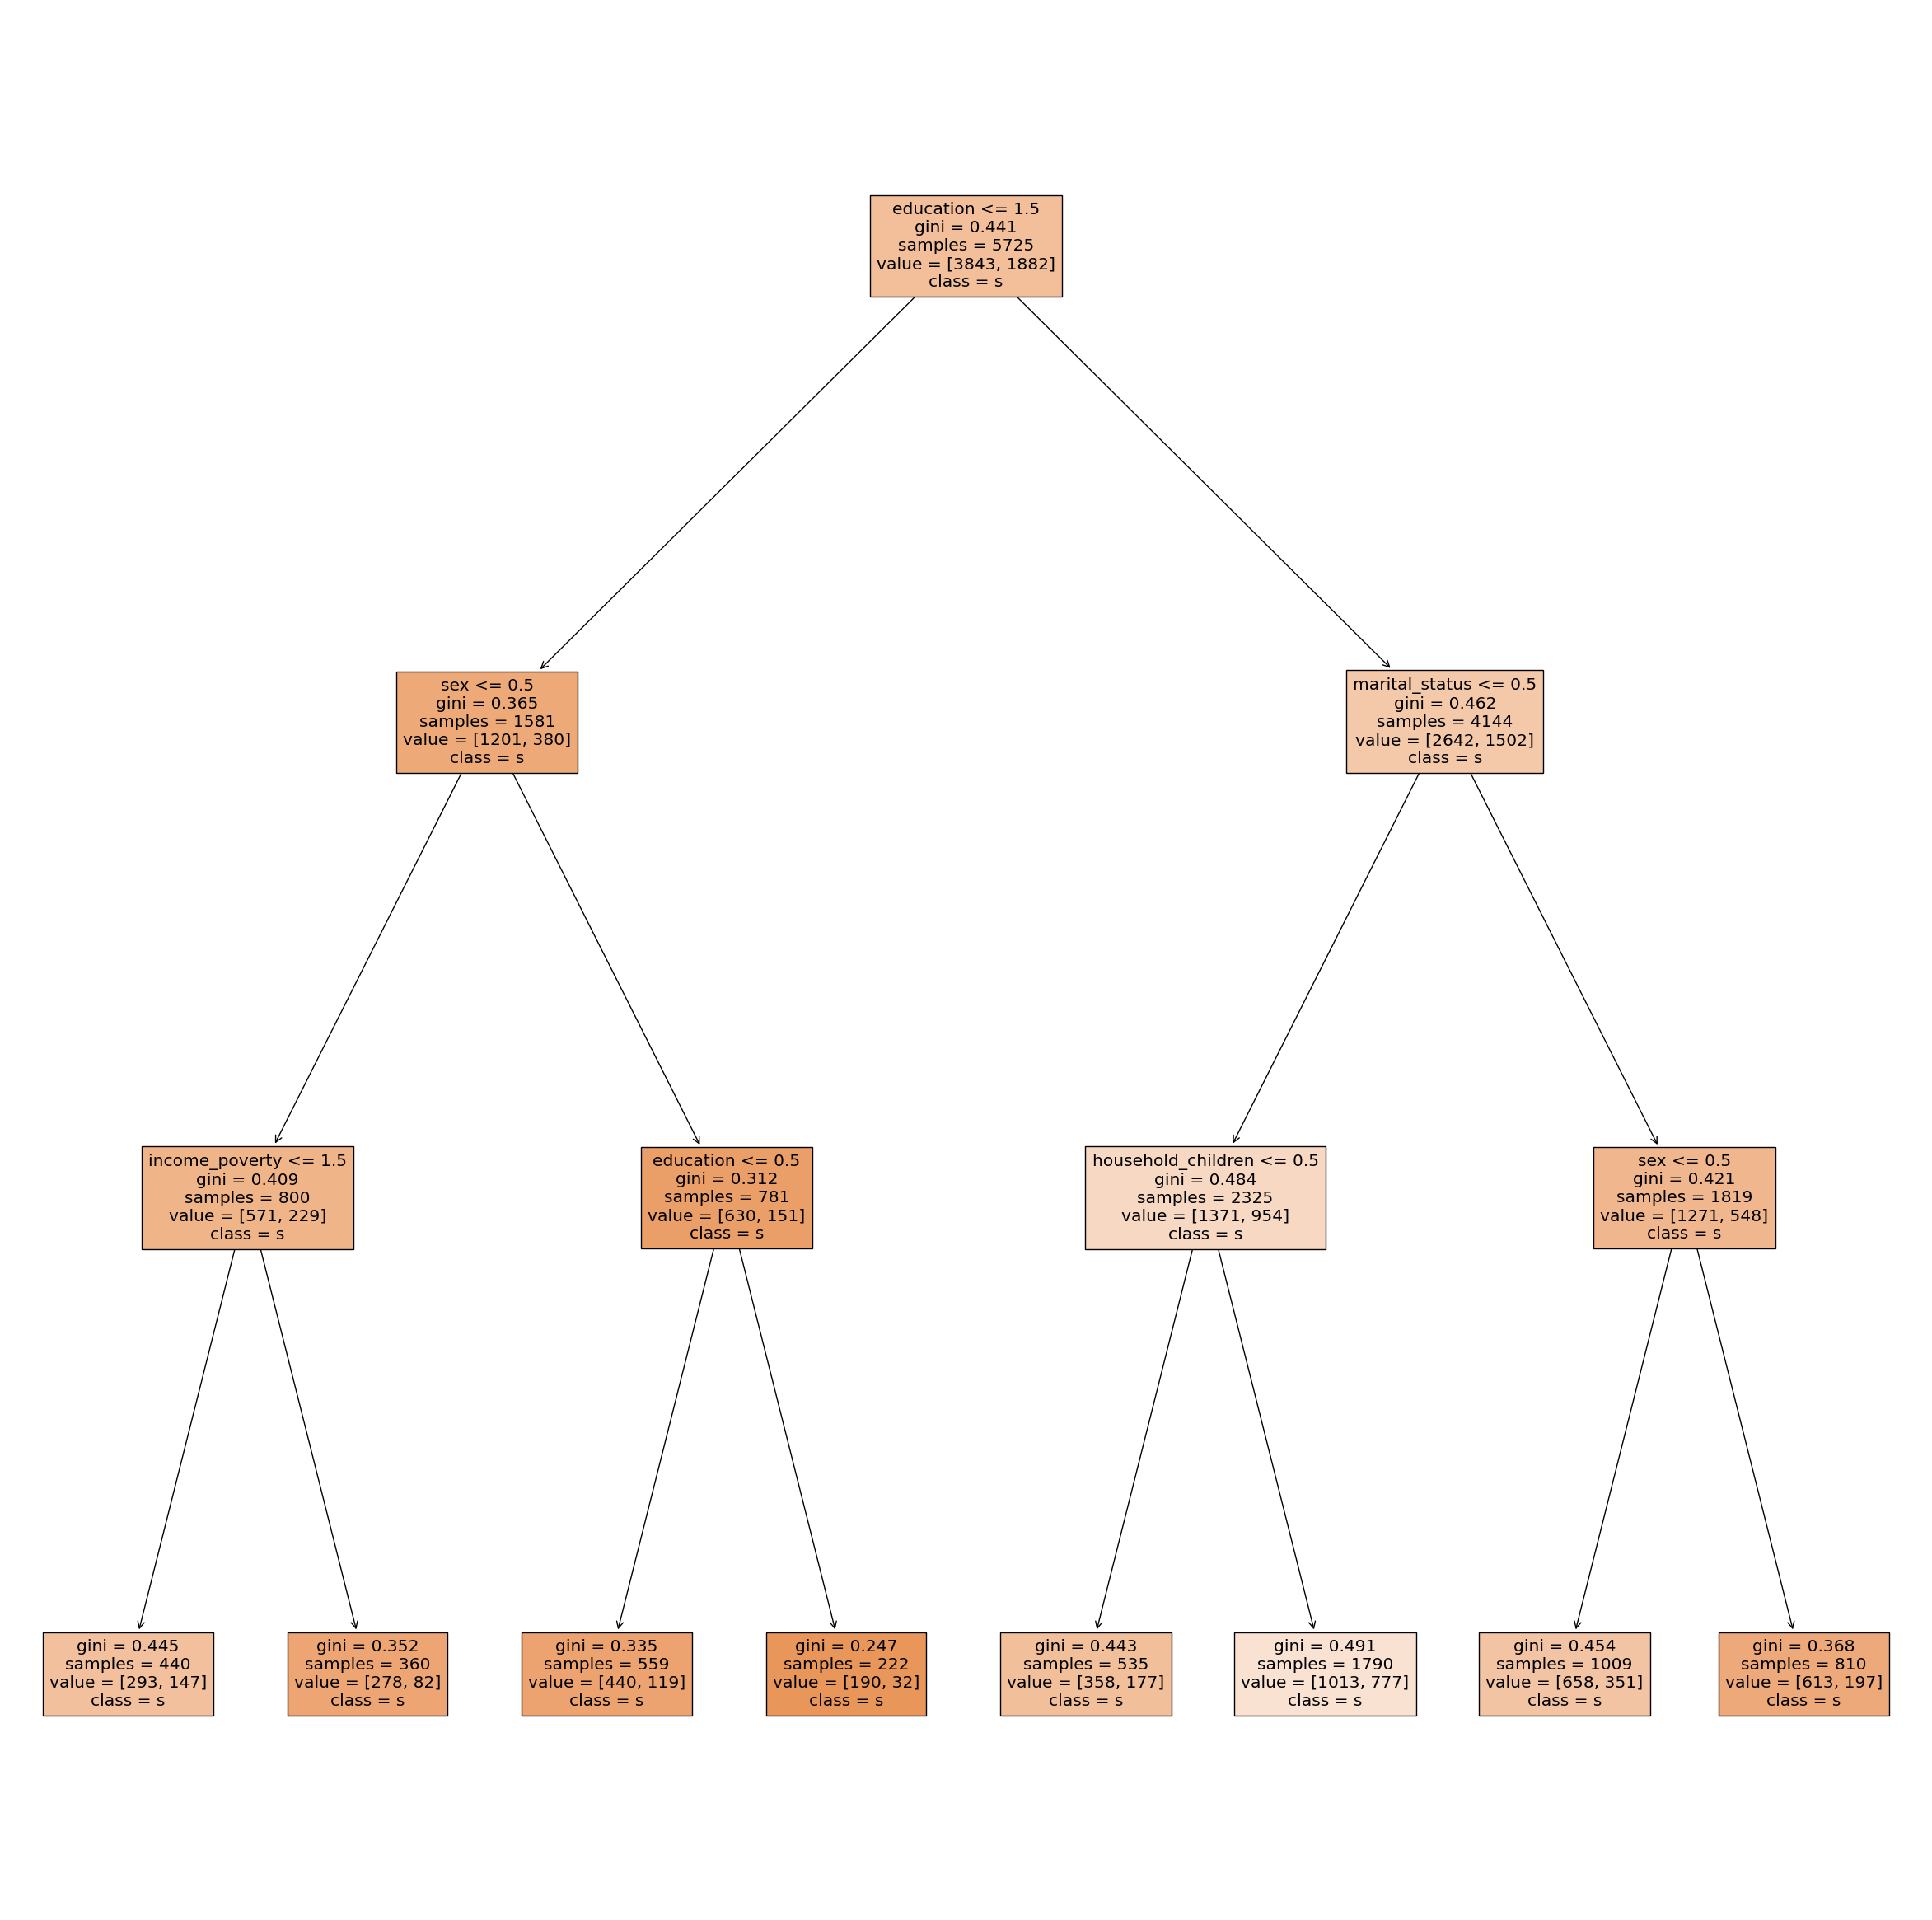

In [175]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (30,30))
plot_tree(tree_clf, feature_names = list(wf_dropped.columns[:-1]), class_names = list(wf_dropped.columns[-1]), filled = True );

NameError: name 'feature_names_after_encoding' is not defined

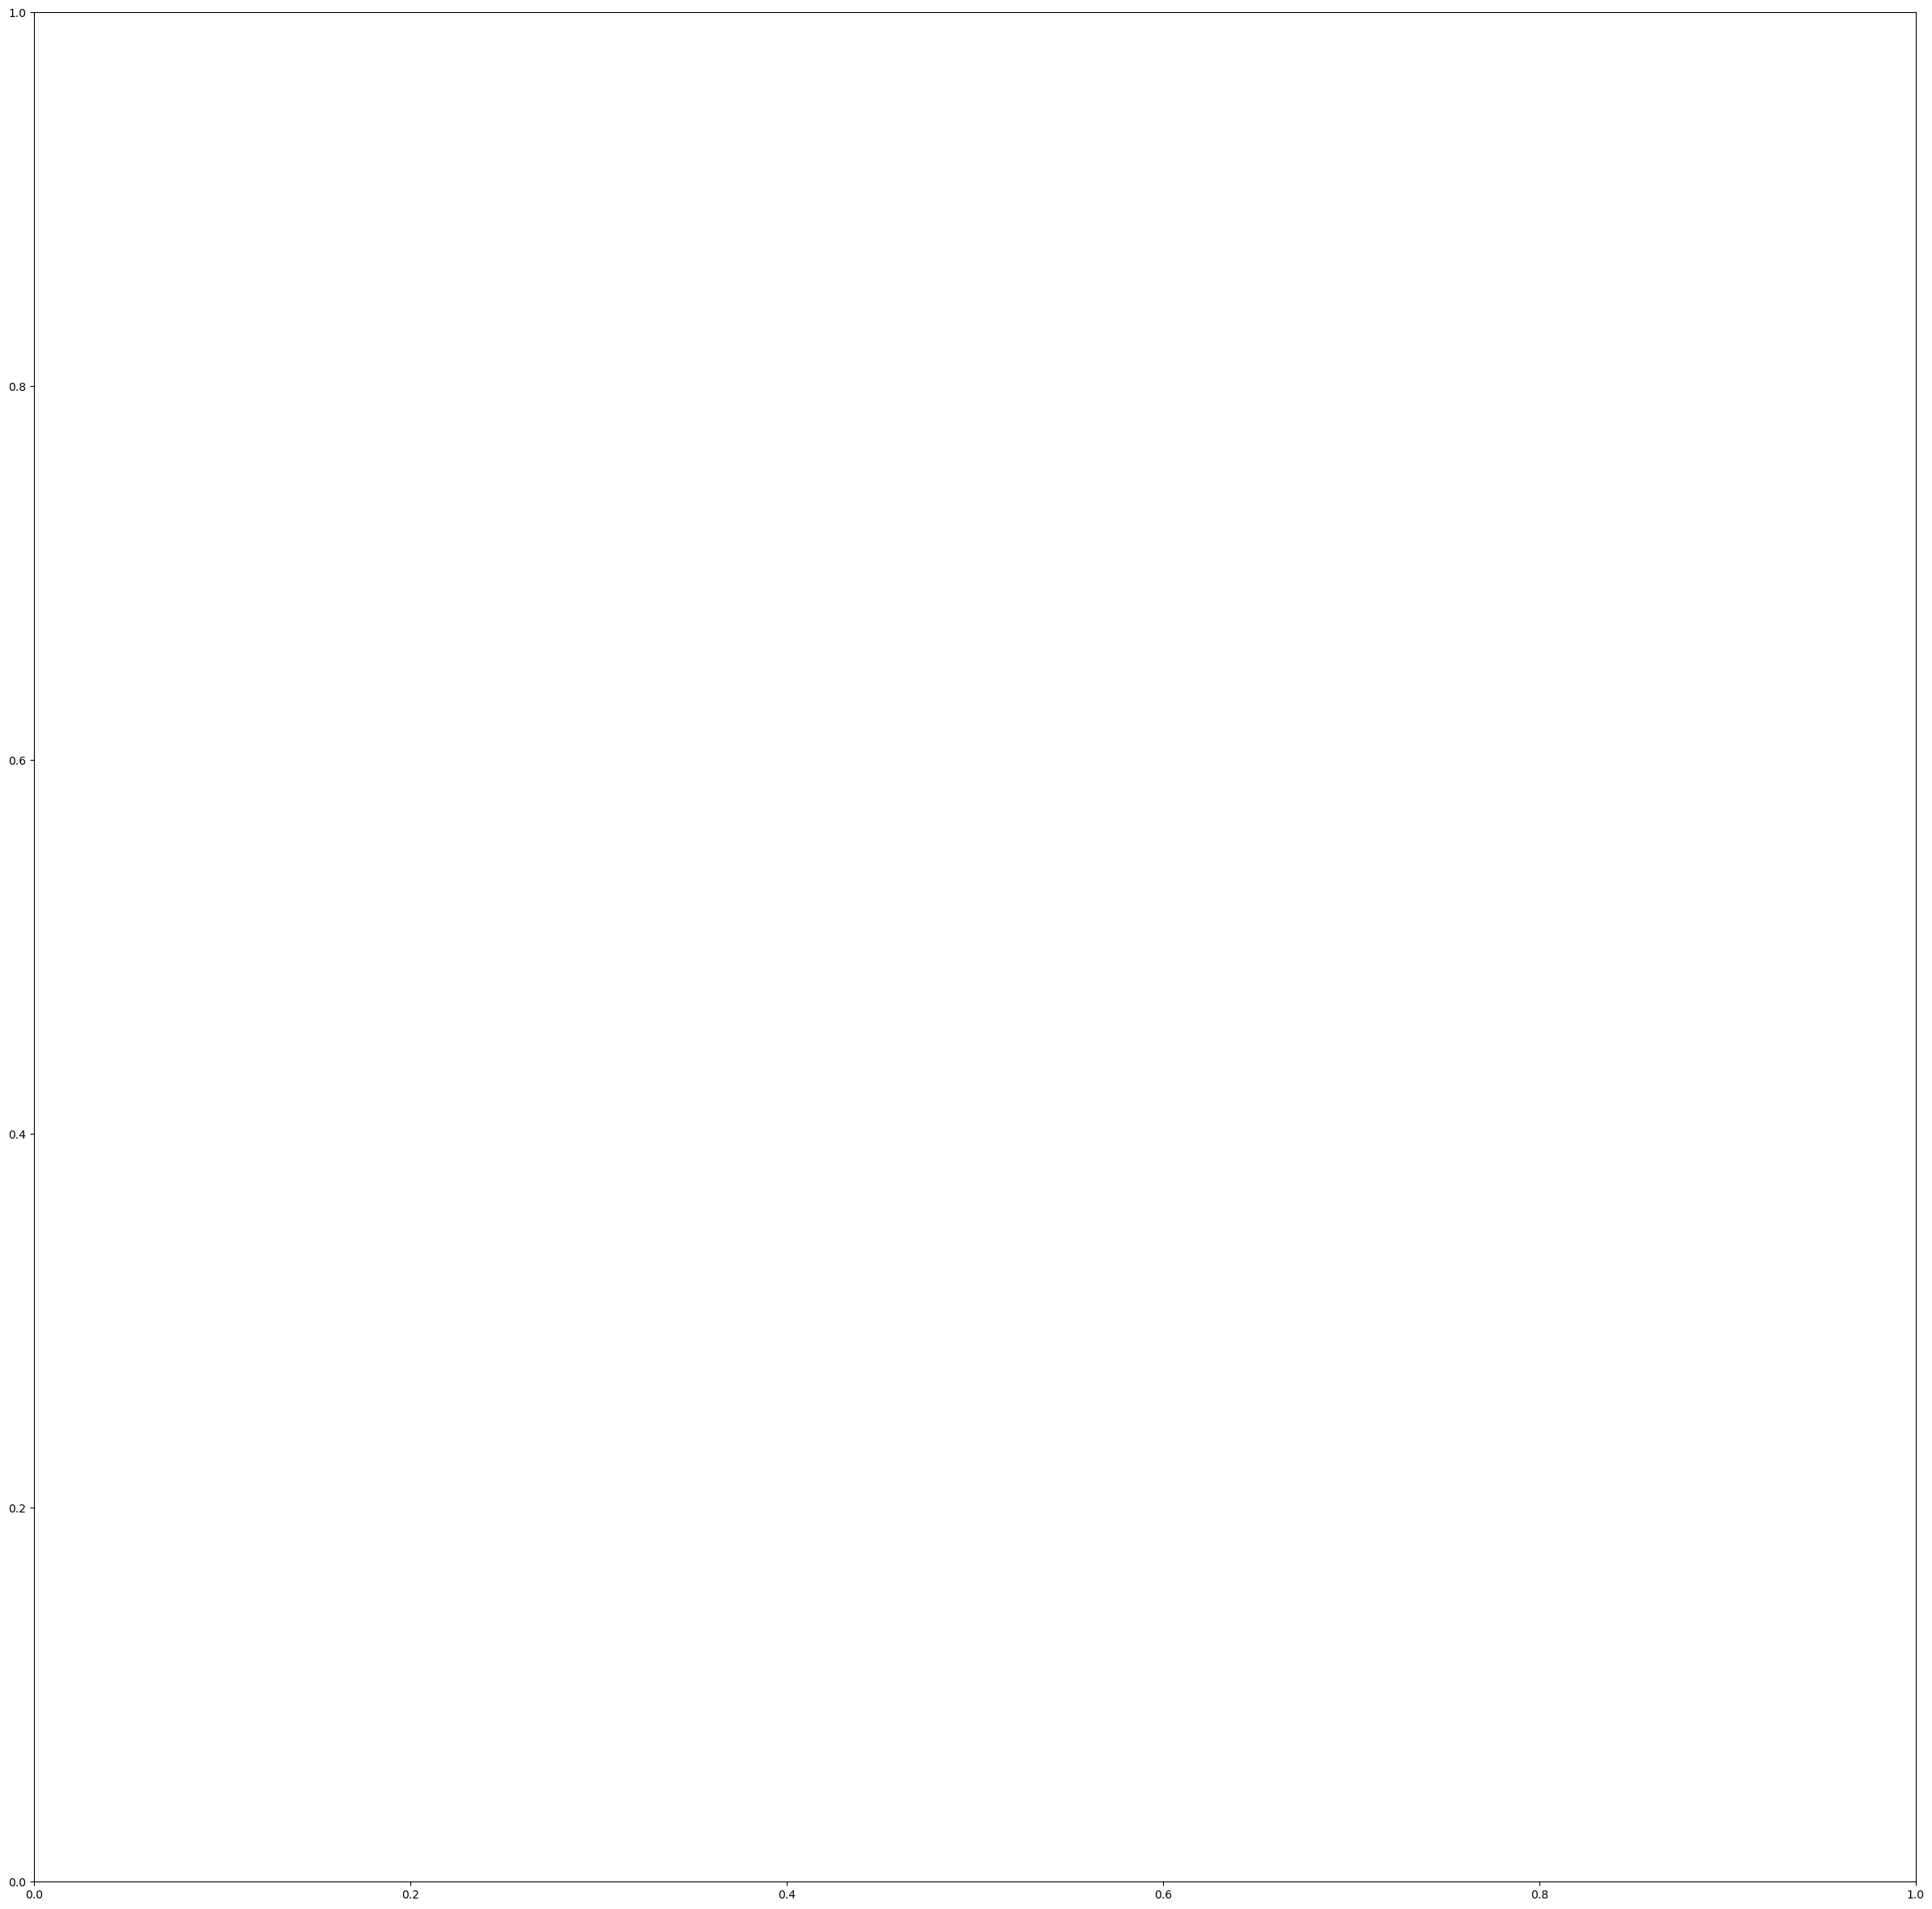

In [176]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (30,30))
plot_tree(tree_clf, 
          feature_names = list(feature_names_after_encoding), 
          class_names = list(feature_names_after_encoding), 
          filled = True );

In [ ]:
wf = ['age_group',
      'education',
      'race',
      'sex',
      'income_poverty',
      'marital_status',
      'hhs_geo_region',
      'household_children',
      'seasonal_vaccine']
wf_df = df[wf]

In [ ]:
wf_dropped = wf_df.dropna()

In [ ]:
wf_dropped['age_group'].value_counts()

In [ ]:
age_cond = (wf_dropped['age_group'] == '18 - 34 Years') | (wf_dropped['age_group'] == '35 - 44 Years')

In [ ]:
wf_dropped = wf_dropped[age_cond]

In [ ]:
wf_dropped['age_group'].value_counts()

In [ ]:
wf_dropped.info()

In [ ]:
wf_dropped = wf_dropped.drop('age_group', axis =1)

In [ ]:
wf_dropped.info()

In [ ]:
X = wf_dropped.drop('seasonal_vaccine', axis =1)
y = wf_dropped['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# OneHotEncoder
# Create an ordinal encoder instance
encoder = OneHotEncoder()
# Fit and transform the data
X_tr_cd = encoder.fit_transform(X_train)
X_tt_cd = encoder.transform(X_test)
# Access the categories mapping
categories_mapping = {feature: encoder.categories_[i].tolist() for i, feature in enumerate(X_train.columns)}
# Display the mapping
print(categories_mapping)

# Instantiate DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)

# Fit to train samples
tree_clf.fit(X_tr_cd, y_train)

# Predict using X_test
y_pred = tree_clf.predict(X_tt_cd)

# Assuming you have an instance of OneHotEncoder named onehot_encoder
feature_names_after_encoding = encoder.get_feature_names_out(input_features=wf_dropped.columns[:-1])
print(feature_names_after_encoding)

# Assuming you have an instance of DecisionTreeClassifier named tree_clf
feature_importances = tree_clf.feature_importances_
print(feature_importances)

# Evaluate the model by accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))



In [ ]:
# Showing feature importances by the Decision Tree
sns.set(style="whitegrid")
plt.figure(figsize=(12,12))
sns.barplot(x=feature_importances, y=feature_names_after_encoding)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (30,30))
plot_tree(tree_clf, 
          feature_names = list(feature_names_after_encoding), 
          class_names = list(feature_names_after_encoding), 
          filled = True );

In [ ]:
from sklearn.compose import ColumnTransformer


In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
ordinal_cols = ['age_group',
                'education',
                'income_poverty']

In [ ]:
nominal_cols = ['race',
                'sex',
                'marital_status',
                'hhs_geo_region']

In [ ]:
no_need_transform_cols = ['doctor_recc_seasonal', 
                          'opinion_seas_vacc_effective',
                          'opinion_seas_risk',
                          'opinion_seas_sick_from_vacc',
                          'household_children']

In [ ]:
wf = ['doctor_recc_seasonal', 
      'opinion_seas_vacc_effective',
      'opinion_seas_risk',
      'opinion_seas_sick_from_vacc',
      'age_group',
      'education',
      'race',
      'sex',
      'income_poverty',
      'marital_status',
      'hhs_geo_region',
      'household_children',
      'seasonal_vaccine']
wf_df = df[wf]

In [ ]:
wf_dropped = wf_df.dropna()

In [ ]:
# Create transformers
ordinal_transformer = OrdinalEncoder()
nominal_transformer = OneHotEncoder(sparse_output=False)

In [ ]:
# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_transformer, ordinal_cols),
        ('nominal', nominal_transformer, nominal_cols),
        ], remainder = 'passthrough')

# Create decision tree model
model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', model)])
# Assign X and y
X = wf_dropped.drop('seasonal_vaccine', axis =1)
y = wf_dropped['seasonal_vaccine']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

In [ ]:
# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_transformer, ordinal_cols),
        ('nominal', nominal_transformer, nominal_cols),
        ], remainder = 'passthrough')

# Create decision tree model
model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', model)])

# Assign X and y
X = wf_dropped.drop('seasonal_vaccine', axis =1)
y = wf_dropped['seasonal_vaccine']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)


# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

In [ ]:
# Get feature names after preprocessing
feature_names = ordinal_cols + list(preprocessor.named_transformers_['nominal']
                                    .get_feature_names_out(nominal_cols))
feature_names += no_need_transform_cols
len(feature_names)

In [ ]:
# Extract feature importances from the decision tree model
importances = pipeline.named_steps['classifier'].feature_importances_
len(importances)

In [ ]:
# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

In [ ]:
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
# Plot the feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (30,30))
plot_tree(tree_clf, 
          feature_names = list(feature_importance_df['Feature']), 
          class_names = list(feature_importance_df['Feature']), 
          filled = True );

# Analysis by Age, gender, education, income_poverty

In [177]:
df = df_tgs.merge(df_fts, on = 'respondent_id', indicator = True)

In [178]:
vac_pct_or_ag = df.groupby(['opinion_seas_risk','age_group'])['seasonal_vaccine'].agg(np.mean)

In [179]:
vac_pct_or_ag = pd.DataFrame(vac_pct_or_ag)

In [180]:
vac_pct_or_ag_pv = vac_pct_or_ag.pivot_table(index = 'opinion_seas_risk', columns = 'age_group')
round(vac_pct_or_ag_pv * 100, 0)

seasonal_vaccine                                            \
age_group            18 - 34 Years 35 - 44 Years 45 - 54 Years 55 - 64 Years   
opinion_seas_risk                                                              
1.0                           12.0          12.0          12.0          19.0   
2.0                           22.0          25.0          30.0          41.0   
3.0                           16.0          38.0          42.0          53.0   
4.0                           42.0          56.0          65.0          74.0   
5.0                           55.0          69.0          74.0          82.0   

                             
age_group         65+ Years  
opinion_seas_risk            
1.0                    42.0  
2.0                    64.0  
3.0                    68.0  
4.0                    82.0  
5.0                    87.0

In [181]:
# order_ed = ['(seasonal_vaccine, < 12 Years)', '(seasonal_vaccine, 12 Years)', '(seasonal_vaccine, Some College)', '(seasonal_vaccine, College Graduate)']
vac_pct_or_ed = df.groupby(['opinion_seas_risk','education'])['seasonal_vaccine'].agg(np.mean)
vac_pct_or_ed = pd.DataFrame(vac_pct_or_ed)
vac_pct_or_ed_pv = vac_pct_or_ed.pivot_table(index = 'opinion_seas_risk', columns = 'education')
vac_pct_or_ed_pv = pd.DataFrame(vac_pct_or_ed_pv)
round(vac_pct_or_ed_pv.iloc[:,[1,0,3,2]]*100,0)


seasonal_vaccine                                       
education               < 12 Years 12 Years Some College College Graduate
opinion_seas_risk                                                        
1.0                           25.0     22.0         18.0             21.0
2.0                           34.0     35.0         36.0             40.0
3.0                           38.0     48.0         63.0             66.0
4.0                           51.0     64.0         65.0             72.0
5.0                           55.0     71.0         78.0             84.0

In [182]:
vac_pct_or_gd = df.groupby(['opinion_seas_risk','sex'])['seasonal_vaccine'].agg(np.mean)
vac_pct_or_gd = pd.DataFrame(vac_pct_or_gd)
vac_pct_or_gd_pv = vac_pct_or_gd.pivot_table(index = 'opinion_seas_risk', columns = 'sex')
round(vac_pct_or_gd_pv * 100, 0)

seasonal_vaccine      
sex                         Female  Male
opinion_seas_risk                       
1.0                           23.0  19.0
2.0                           39.0  35.0
3.0                           58.0  53.0
4.0                           68.0  64.0
5.0                           77.0  69.0

In [183]:
vac_pct_or_ic = df.groupby(['opinion_seas_risk','income_poverty'])['seasonal_vaccine'].agg(np.mean)
vac_pct_or_ic = pd.DataFrame(vac_pct_or_ic)
vac_pct_or_ic_pv = vac_pct_or_ic.pivot_table(index = 'opinion_seas_risk', columns = 'income_poverty')
round(vac_pct_or_ic_pv.iloc[:,[2,0,1]] * 100, 0)

seasonal_vaccine                                    
income_poverty       Below Poverty <= $75,000, Above Poverty > $75,000
opinion_seas_risk                                                     
1.0                           21.0                      21.0      18.0
2.0                           28.0                      38.0      37.0
3.0                           40.0                      58.0      65.0
4.0                           46.0                      67.0      72.0
5.0                           56.0                      77.0      86.0